In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import trecs
from trecs.models import Homogenizer, ContentFiltering, ImplicitMF
from trecs.random import Generator
from trecs.metrics import HomogeneityMeasurement, RecSimilarity, InteractionSimilarity, AverageFeatureScoreRange

In [13]:
num_users = 10
num_items = 100
num_attrs = 20
startup_iters=10


sim_iters = 50
# simpler way to pass common arguments
init_params = {
    "num_items_per_iter": 100
}

run_params = {
    "train_between_steps": True,
    "random_items_per_iter": 0,
    "vary_random_items_per_iter": False,
    "timesteps": sim_iters,
    "repeated_items": False
}

pairs = [np.random.choice(num_users, 2, replace=False) for _ in range(800)]

In [14]:
#cf=ContentFiltering(**init_params)
#hm=Homogenizer(model_class=ImplicitMF)
hm=Homogenizer()

initializing Child instance


In [15]:
hm.add_metrics(InteractionSimilarity(pairs))

In [16]:
hm.startup_and_train(timesteps=startup_iters)
hm.run(**run_params)


 18%|█▊        | 9/50 [00:00<00:00, 87.01it/s]

Homogenization proportion is 0
Homogenization proportion is 0.1
Homogenization proportion is 0.2
Homogenization proportion is 0.30000000000000004
Homogenization proportion is 0.4
Homogenization proportion is 0.5
Homogenization proportion is 0.6
Homogenization proportion is 0.7
Homogenization proportion is 0.7999999999999999
Homogenization proportion is 0.8999999999999999
Homogenization proportion is 0.9999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999


 46%|████▌     | 23/50 [00:00<00:00, 73.93it/s]

Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999


 58%|█████▊    | 29/50 [00:00<00:00, 67.09it/s]

Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999


 80%|████████  | 40/50 [00:00<00:00, 57.18it/s]

Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999


100%|██████████| 50/50 [00:00<00:00, 57.63it/s]

Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999
Homogenization proportion is 1.0999999999999999


In [17]:
results = hm.get_measurements()

print("Results of the simulation:")
pd.DataFrame(results)

Results of the simulation:


,mse,interaction_similarity,timesteps
0,None,None,0
1,0.513638534579515,0.0,1
2,0.513638534579515,0.0,2
3,0.513638534579515,0.0,3
4,0.513638534579515,0.0,4
...,...,...,...
56,0.7805412411531798,0.5302257339794426,56
57,0.7805412411531798,0.5419597240992816,57
58,0.7805412411531798,0.5411721787173084,58
59,0.7805412411531798,0.5467105947212202,59


Text(0, 0.5, 'Interaction Similarity (Random Pairs)')

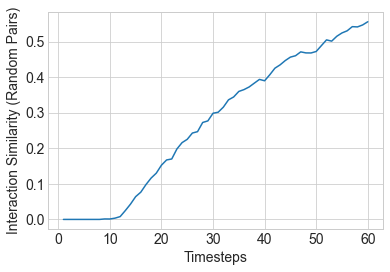

In [18]:
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 14})
plt.plot(results['timesteps'], results['interaction_similarity'])
plt.xlabel("Timesteps")
plt.ylabel("Interaction Similarity (Random Pairs)")
